# ME 454 Homework 4
## By: Christopher Tsai

In [79]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from IPython.display import display

Problem 1:

In [81]:
alpha = 0.4
beta = 0.7
epsilon = 10e-6

x1, x2 = sym.symbols('x1, x2')
x = sym.Matrix([[x1], [x2]])

f = x[0,0]**2 + 100*x[1,0]**2
Df = sym.Matrix([[sym.diff(f, x1)], [sym.diff(f, x2)]])
z = -Df
Df_z = Df[0,0]*z[0,0] + Df[1,0]*z[1,0]

xi = x.subs({x1: 10, x2: 10})    # initial guess
fi = f.subs({x1: xi[0,0], x2: xi[1,0]})
Dfi = Df.subs({x1: xi[0,0], x2: xi[1,0]})
zi = z.subs({x1: xi[0,0], x2: xi[1,0]})
Df_zi = Df_z.subs({x1: xi[0,0], x2: xi[1,0]})

i = 0
f_list = []
f_list.append(fi)

while Dfi.norm() > epsilon:
    n = 0
    gamma = beta**n
        
    while (f.subs({x1: xi[0,0] + gamma*zi[0,0], x2: xi[1,0] + gamma*zi[1,0]})) > (fi + (alpha*gamma*Df_zi)):
            n += 1
            gamma = beta**n
            
    xi += gamma*zi
           
    fi = f.subs({x1: xi[0,0], x2: xi[1,0]})
    Dfi = Df.subs({x1: xi[0,0], x2: xi[1,0]})
    zi = z.subs({x1: xi[0,0], x2: xi[1,0]})
    Df_zi = Df_z.subs({x1: xi[0,0], x2: xi[1,0]})

    f_list.append(fi)
    i += 1
               
print("Minimizer is: xi = ")
display(xi)
print("(essentially the coordinate origin)")

Minimizer is: xi = 


Matrix([
[3.73346198932927e-6],
[2.04343711701928e-8]])

(essentially the coordinate origin)


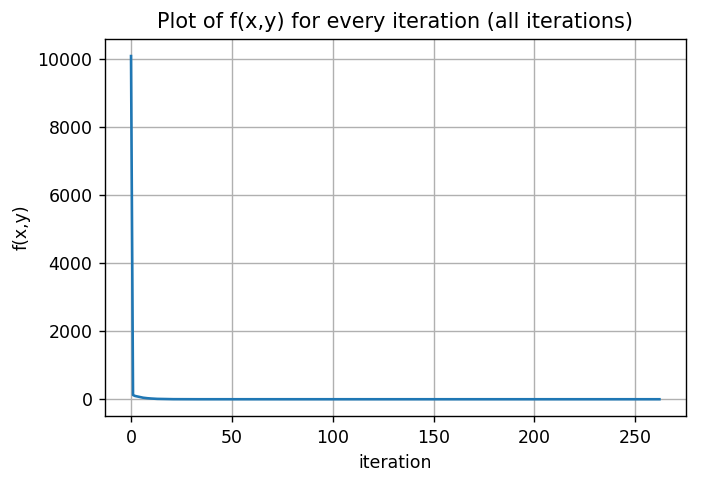

In [82]:
plt.figure(dpi=125, facecolor='w')
plt.plot([j for j in range(len(f_list))], [f_list[k] for k in range(len(f_list))])
plt.xlabel('iteration')
plt.ylabel('f(x,y)')
plt.grid(True)
plt.title("Plot of f(x,y) for every iteration (all iterations)")
plt.show()

Problem 2 Part a:

In [83]:
x11, x12, x21, x22 = sym.symbols('x11, x12, x21, x22')

v1 = sym.Matrix([[1], [0]])
v2 = sym.Matrix([[0], [1]])

X = sym.Matrix([[x11, x12], [x21, x22]])

f = v1.T*X.T*X*v1 + 10*v2.T*X.T*X*v2
Df = sym.Matrix([[sym.diff(f, x11), sym.diff(f, x12)], [sym.diff(f, x21), sym.diff(f, x22)]])
Z = -Df

Df_Z = Df[0,0]*Z[0,0] + Df[0,1]*Z[0,1] + Df[1,0]*Z[1,0] + Df[1,1]*Z[1,1]

print("The directional derivative of f(X) in the direction of Z is:")
Df_Z

The directional derivative of f(X) in the direction of Z is:


-4*x11**2 - 400*x12**2 - 4*x21**2 - 400*x22**2

Problem 2 Part b:

In [84]:
print("The gradient of f(X) is:")
Df

The gradient of f(X) is:


Matrix([
[2*x11, 20*x12],
[2*x21, 20*x22]])

Problem 3:

Minimizer is: Xi = 


Matrix([
[2.33460802160657e-6, -6.3541241674898e-8],
[2.33460802160657e-6, -6.3541241674898e-8]])

(essentially the coordinate origin)


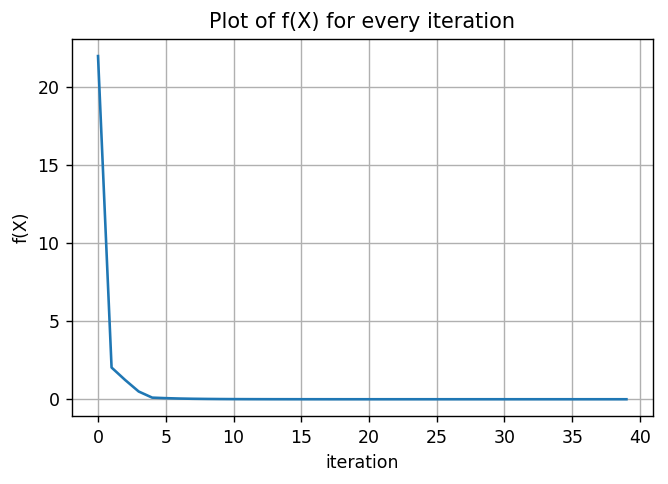

In [85]:
Xi = X.subs({x11: 1, x12: 1, x21: 1, x22: 1})    # initial guess
fi = f.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})
Dfi = Df.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
Zi = Z.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
Df_Zi = Df_Z.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  

i = 0
f_list = []
f_list.append(fi)

while Dfi.norm() > epsilon:
    n = 0
    gamma = beta**n

    while (f.subs({x11: Xi[0,0] + gamma*Zi[0,0], x12:Xi[0,1] + gamma*Zi[0,1], x21:Xi[1,0] + gamma*Zi[1,0],  
                  x22:Xi[1,1] + gamma*Zi[1,1]}))[0] > (fi + sym.Matrix([alpha*gamma*Df_Zi]))[0]:
        n += 1
        gamma = beta**n  
            
    Xi += gamma*Zi
    
    fi = f.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})
    Dfi = Df.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
    Zi = Z.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
    Df_Zi = Df_Z.subs({x11: Xi[0,0], x12: Xi[0,1], x21: Xi[1,0], x22: Xi[1,1]})  
    
    f_list.append(fi)
    i += 1

print("Minimizer is: Xi = ")
display(Xi)
print("(essentially the coordinate origin)")

plt.figure(dpi=125, facecolor='w')
plt.plot([j for j in range(len(f_list))], [f_list[k][0] for k in range(len(f_list))])
plt.xlabel('iteration')
plt.ylabel('f(X)')
plt.grid(True)
plt.title("Plot of f(X) for every iteration")
plt.show()